In [144]:
import matplotlib.pyplot as plt
import pyodbc
import numpy as np
import pandas as pd
import seaborn as sns

In [145]:
server = "localhost"
database = "Spr_2024"
username = "raymondtecaxcoflores14"
password = "CCny23652014"

cnxn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};SERVER="
    + server
    + ";DATABASE="
    + database
    + ";UID="
    + username
    + ";PWD="
    + password
)

cnxn.autocommit = True

In [146]:
sql_query = """
        SELECT od.order_date_DateOrders,
            od.Order_Country,
            od.Order_Item_Cardprod_Id,
            od.Order_State,
            od.Order_Zipcode,
            od.Sales,
            pd.Product_Card_Id,
            pd.Category_Name


        FROM OrderData AS od
            LEFT JOIN ProductData AS pd
                ON od.Order_Item_Cardprod_Id = pd.Product_Card_Id
                
        WHERE (Order_Country = 'Estados Unidos')
            OR (Order_Country = 'Alemania')
            OR (Order_Country = 'Francia')
"""

In [136]:
data = pd.read_sql(sql=sql_query, con=cnxn)

Text(0.5, 1.0, 'Total Sales For Top 3 Performing Countries')

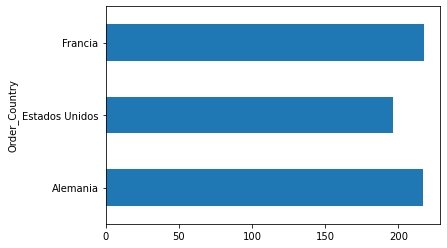

In [137]:
data.groupby('Order_Country')['Sales'].mean().plot(kind='barh')
#plt.barh('Country', 'Sales')
ax.set_xlabel('Sales')
ax.set_title('Total Sales For Top 3 Performing Countries')

In [168]:
#data.groupby('Order_Country')['Order_Zipcode']

In [167]:
plt.figure(figsize=(50,120))
total_Sales = pd.DataFrame(data.groupby(['Order_Country', 'Order_Zipcode'])['Sales'].sum().sort_values())


#plt.bar(total_Sales.index, total_Sales['Sales'])

#plt.show()

<Figure size 3600x8640 with 0 Axes>

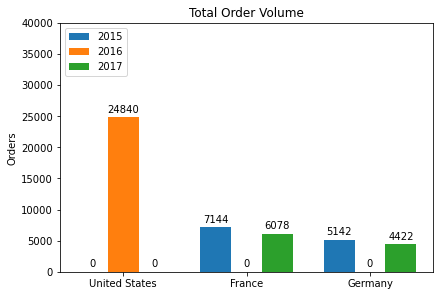

In [44]:
Countries = ("United States", "France", "Germany")
Order_Volume = {
    '2015': (0, 7144, 5142),
    '2016': (24840, 0, 0),
    '2017': (0, 6078, 4422),
}

x = np.arange(len(Countries))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in Order_Volume.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Orders')
ax.set_title('Total Order Volume')
ax.set_xticks(x + width, Countries)
ax.legend(loc='upper left')
ax.set_ylim(0, 40000)

plt.show()